<a href="https://colab.research.google.com/github/1991Ab/Capstone-project-2-Taxi-trip-time-Prediction/blob/main/Taxi_trip_time_Prediction_individual_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats

Mounting the Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the data

In [ ]:
file_path="/content/drive/MyDrive/Capstone project-2/NYC Taxi Data (1).csv"
df=pd.read_csv(file_path)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.shape

(1458644, 11)

We see that the Taxi_trip.csv file contains 1458644 values and 11 features 

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


 Checking for NAN values

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

We can see that in our data there are no null values.

In [ ]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Changing  all the datatypes to int

In [ ]:
df['dropoff_datetime']

0          2016-03-14 17:32:30
1          2016-06-12 00:54:38
2          2016-01-19 12:10:48
3          2016-04-06 19:39:40
4          2016-03-26 13:38:10
                  ...         
1458639    2016-04-08 13:44:02
1458640    2016-01-10 07:46:10
1458641    2016-04-22 07:10:25
1458642    2016-01-05 16:02:39
1458643    2016-04-05 14:47:43
Name: dropoff_datetime, Length: 1458644, dtype: object

In [ ]:
# code for changing format of date from object to datetime
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format= '%Y-%m-%d')

In [ ]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'], format= '%Y-%m-%d' )

In [ ]:
df['pickup_datetime'].dtype


In [ ]:
#code to change the values of categorical column 'store_and_fwd_flag' to numerical values.
#For that we have used 'One hot Encoding ' method.

print(df['store_and_fwd_flag'].unique())


['N' 'Y']


In [ ]:
taxi_trip_encoded=pd.get_dummies(df,columns = ['store_and_fwd_flag'])
taxi_trip_encoded.shape

(1458644, 12)

In [ ]:
taxi_trip_encoded.head()


In [ ]:
#Plotting boxplots for all the features to check for outliers.
taxi_trip_encoded.describe().apply(lambda s: s.apply('{0:.2f}'.format))


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49,0.99,0.01
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43,0.07,0.07
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00,0.00,0.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00,1.00,0.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00,1.00,0.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00,1.00,0.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00,1.00,1.00


From the above code we can see that the minimum value of 'passenger_count' is 0 whereas maximum value is 9.Number of passengers can nither be zero nor as high as 9.So this is a outlier which can be removed.Also trip duration has minimum value of 1 second which can be considered as an outlier.

In [ ]:
#Plotting boxplots for all the features to check for outliers.
columns=taxi_trip_encoded.describe().columns
for c in columns :
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  taxi_trip_encoded.boxplot(column=c , ax=ax)
  ax.set_ylabel(c)
  plt.title("Box plot for " + c)
  plt.show()



We can see that the feature 'vendor_id' has no outlier.The feature to be predicted :'trip_duration' and all other columns have many outliers which have to be removed.

**Outlier Detection using IQR Method**
IQR=Q3-Q1

lower_limit_outlier=Q1-1.5*IQR

upper_limit_outlier=Q3+1.5*IQR¶

so we have to take the values which is greater then lower limit outlier and less then upper limit outlier remove the outlier

In [ ]:
#Detection an removal of outliers.
#columns=["passenger_count" , "pickup_longitude" , "pickup_latitude", "dropoff_longitude" , "dropoff_latitude" , "trip_duration"]
#for c in columns :
  #percentile_q1 =   np.percentile(taxi_trip_encoded[c],25)
  #print(percentile_q1)
  #percentile_q2 =  np.percentile(taxi_trip_encoded[c],50)
  #print(percentile_q2)
  #percentile_q3 = np.percentile(taxi_trip_encoded[c],75)
  #print(percentile_q3)
  #iqr=percentile_q3 - percentile_q1
  #lower_limit_outlier=percentile_q1-(1.5*iqr)
  #upper_limit_outlier=percentile_q3+(1.5*iqr)
  #print("lower limit for outlier  :",c,lower_limit_outlier)
  #print("Upper limit for outlier  :",c,upper_limit_outlier)
  #taxi_trip_encoded=taxi_trip_encoded[taxi_trip_encoded[c]>lower_limit_outlier]
  #taxi_trip_encoded=taxi_trip_encoded[taxi_trip_encoded[c]<upper_limit_outlier]

In [ ]:
#taxi_trip_encoded.shape

In [ ]:
#taxi_trip_encoded.passenger_count.value_counts

Now lets check the distribution of our target variable that is 'Trip Duration'.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of the target variable Trip Duration')]

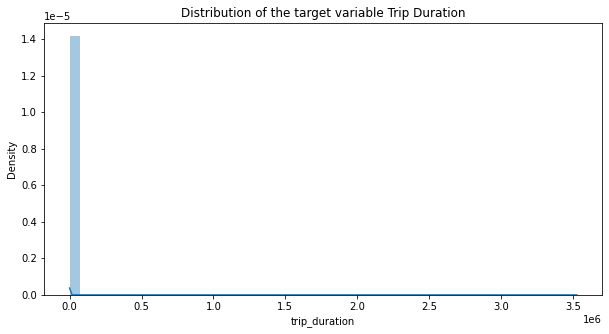

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(taxi_trip_encoded['trip_duration']).set(title="Distribution of the target variable Trip Duration")

Here we see that the data for target variable 'Trip Duration' is not  in Normal Distribution.Hence we apply the Log transformation technique to make the data normally distributed. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2681: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:177: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  kws["color"] = to_rgba(color, alpha)


[Text(0.5, 1.0, 'Distribution Plot with Log Transformation for Trip Duration')]

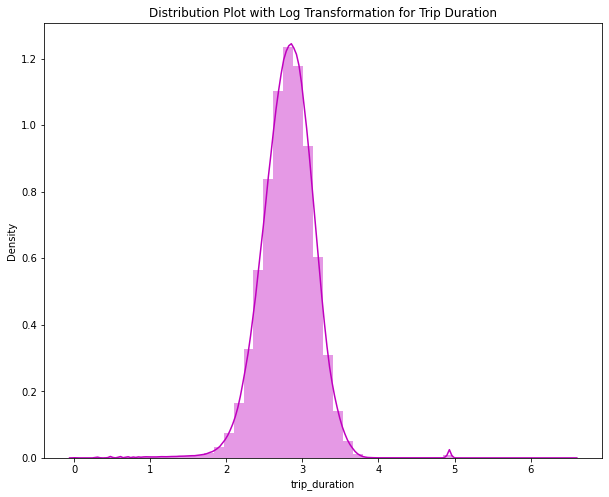

In [ ]:
#Applying log transformation for 'Trip_duration'.
plt.figure(figsize=(10,8))
sns.distplot(np.log10(taxi_trip_encoded['trip_duration']),color="M").set(title='Distribution Plot with Log Transformation for Trip Duration')